# Data Preprocessing

scanpy tutorial: https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

In [ ]:
!pip install scanpy
!pip install anndata
!pip install leidenalg
!pip install louvain
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install scipy
!pip install seaborn
!pip install shap pdpbox
!pip install tf-keras-vis
!pip install -U cellxgene-census
!pip install cuml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 136.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cellxgene_census

In [ ]:
with cellxgene_census.open_soma() as census:

    # Reads SOMADataFrame as a slice
    cell_metadata = census["census_data"]["homo_sapiens"].obs.read(
        value_filter = "disease in ['Parkinson disease']",
        column_names = ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease", "dataset_id"]
    )

    # Concatenates results to pyarrow.Table
    cell_metadata = cell_metadata.concat()

    # Converts to pandas.DataFrame
    cell_metadata = cell_metadata.to_pandas()

    print(cell_metadata)

The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.
INFO:cellxgene_census:The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.


             assay                          cell_type  \
0        10x 3' v3                   endothelial cell   
1        10x 3' v3                   endothelial cell   
2        10x 3' v3                   endothelial cell   
3        10x 3' v3                   endothelial cell   
4        10x 3' v3                   endothelial cell   
...            ...                                ...   
1786197  10x 3' v3                   GABAergic neuron   
1786198  10x 3' v3                          astrocyte   
1786199  10x 3' v3               glutamatergic neuron   
1786200  10x 3' v3  central nervous system macrophage   
1786201  10x 3' v3                    oligodendrocyte   

                                 tissue tissue_general suspension_type  \
0        substantia nigra pars compacta          brain         nucleus   
1        substantia nigra pars compacta          brain         nucleus   
2        substantia nigra pars compacta          brain         nucleus   
3        substantia

In [ ]:
# pull out the unique dataset ids
unique_ids = cell_metadata['dataset_id'].unique()
unique_ids

['f5be4b96-f5a3-4c3d-84ac-6f69daf744d5', '4dd1cd23-fc4d-4fd1-9709-602540f3ca6f', 'f8d8b443-bca6-4c3c-9042-669dfb7f8030', '07760522-707a-4a1c-8891-dbd1226d6b27', '2856d06c-0ff9-4e01-bfc9-202b74d0b60f', '5829c7ba-697f-418e-8b98-d605b192dc48', '251b1a7e-d050-4486-8d50-4c2619eb0f46', 'd3cb449b-c2b1-4b50-a7f1-21203535fe61']
Categories (893, object): ['0041b9c3-6a49-4bf7-8514-9bc7190067a7', '00476f9f-ebc1-4b72-b541-32f912ce36ea',
                           '00593d17-0693-4646-acad-89dbefba11bb', '0087cde2-967d-4f7c-8e6e-40e4c9ad1891', ...,
                           'ff45e623-7f5f-46e3-b47d-56be0341f66b', 'ff4cfa86-9c0c-4b7c-abd6-90547657d04f',
                           'ff7d15fa-f4b6-4a0e-992e-fd0c9d088ded', 'ff995299-bf56-4d11-914d-b77949f02fb1']

In [ ]:
import pandas as pd

# assume your DataFrame is called df

# group by dataset_id and collect unique cell types
cell_type_lists = (
    cell_metadata
    .groupby('dataset_id')['cell_type']
    .unique()
    .apply(lambda arr: sorted(arr))
)

# display for each dataset_id
for ds_id, cell_types in cell_type_lists.items():
  if len(cell_types) > 0:
    print(f"Dataset {ds_id!r} has {len(cell_types)} cell types:")
    for ct in cell_types:
        print(f"  - {ct}")
    print()


Dataset '07760522-707a-4a1c-8891-dbd1226d6b27' has 1 cell types:
  - astrocyte

Dataset '251b1a7e-d050-4486-8d50-4c2619eb0f46' has 1 cell types:
  - neuron

Dataset '2856d06c-0ff9-4e01-bfc9-202b74d0b60f' has 1 cell types:
  - dopaminergic neuron

Dataset '4dd1cd23-fc4d-4fd1-9709-602540f3ca6f' has 1 cell types:
  - oligodendrocyte precursor cell

Dataset '5829c7ba-697f-418e-8b98-d605b192dc48' has 1 cell types:
  - oligodendrocyte

Dataset 'd3cb449b-c2b1-4b50-a7f1-21203535fe61' has 11 cell types:
  - GABAergic neuron
  - astrocyte
  - central nervous system macrophage
  - central nervous system neuron
  - endothelial cell
  - ependymal cell
  - glutamatergic neuron
  - leukocyte
  - mural cell
  - oligodendrocyte
  - oligodendrocyte precursor cell

Dataset 'f5be4b96-f5a3-4c3d-84ac-6f69daf744d5' has 1 cell types:
  - endothelial cell

Dataset 'f8d8b443-bca6-4c3c-9042-669dfb7f8030' has 1 cell types:
  - microglial cell



<ipython-input-10-e1f5293354da>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('dataset_id')['cell_type']


In [ ]:
import numpy as np
import tiledbsoma
import cellxgene_census

# 1) your big obs-filter
value_filter = (
    "cell_type in ['GABAergic neuron', 'glutamatergic neuron', 'neuron', 'endothelial cell', 'oligodendrocyte', 'oligodendrocyte precursor cell'] "
    "and disease in ['Parkinson disease', 'normal'] "
    "and dataset_id in ["
      "'f5be4b96-f5a3-4c3d-84ac-6f69daf744d5',"
      "'4dd1cd23-fc4d-4fd1-9709-602540f3ca6f',"
      "'f8d8b443-bca6-4c3c-9042-669dfb7f8030',"
      "'07760522-707a-4a1c-8891-dbd1226d6b27',"
      "'2856d06c-0ff9-4e01-bfc9-202b74d0b60f',"
      "'5829c7ba-697f-418e-8b98-d605b192dc48',"
      "'251b1a7e-d050-4486-8d50-4c2619eb0f46',"
      "'d3cb449b-c2b1-4b50-a7f1-21203535fe61'"
    "]"
)
k = 100000

# STEP 1: get all soma_joinids matching your filter
with cellxgene_census.open_soma(census_version="2025-01-30") as census:
    human = census["census_data"]["homo_sapiens"]
    aq = tiledbsoma.AxisQuery(value_filter=value_filter)
    query = human.axis_query(measurement_name="RNA", obs_query=aq)
    all_ids = query.obs_joinids().to_pylist()
    query.close()

all_ids = np.array(all_ids, dtype=str)
if len(all_ids) > k:
    sampled_ids = list(np.random.choice(all_ids, size=k, replace=False))
else:
    sampled_ids = list(all_ids)

# … after your STEP 1 sampling logic …
# sampled_ids is currently a list of str; convert to int:
sampled_ids_int = [int(x) for x in sampled_ids]

# STEP 2: re-fetch into AnnData
with cellxgene_census.open_soma(census_version="2025-01-30") as census:
    adata = cellxgene_census.get_anndata(
        census=census,
        organism="Homo sapiens",
        obs_coords=sampled_ids_int,
        obs_column_names=["assay","cell_type","tissue","tissue_general",
                          "suspension_type","disease","sex","dataset_id", "development_stage"],
        var_column_names=["feature_name","feature_id","feature_type"],
    )

print(adata)



In [ ]:
query.close()

In [ ]:

# Path to write locally
tmp_path = "adata_parkinsons_100k.h5ad"
adata.write(tmp_path)

# Try Colab mount
try:
    from google.colab import drive
    drive.mount('/content/drive')
    dst = '/content/drive/MyDrive/adata_parkinsons_100k.h5ad'
    adata.write(dst)
    print("Saved to Drive via Colab mount:", dst)
except Exception:
    # Fall back to PyDrive upload
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive

    gauth = GoogleAuth()
    gauth.LocalWebserverAuth()       # opens a browser for auth
    drive = GoogleDrive(gauth)

    file = drive.CreateFile({'title': 'adata_parkinsons_100k.h5ad'})
    file.SetContentFile(tmp_path)
    file.Upload()
    print("Uploaded to Google Drive via PyDrive")


## Updating Gene and Cell Names
#### - changing genes to gene ids
#### - changing anything with "neuron" in it to "neuron"


In [ ]:
# reset variable names from 0,1,2....
adata.var.set_index("feature_name", inplace=True)
print("new var_names:", adata.var_names[:10])


NameError: name 'adata' is not defined

In [ ]:
# change name of anything with neuron in it within the cell_type obs to just "neuron"
# make a writable copy of the obs DataFrame
adata.obs = adata.obs.copy()

# now your assignment will work
adata.obs.loc[
    adata.obs["cell_type"].str.contains("neuron", na=False),
    "cell_type"
] = "neuron"


In [ ]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [ ]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

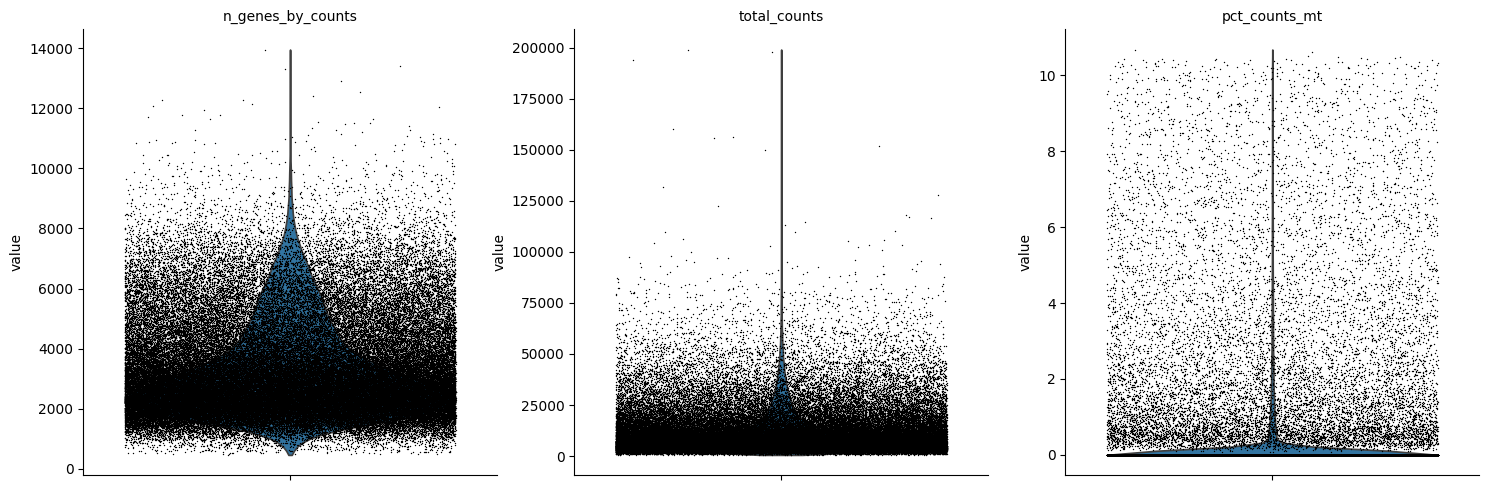

In [ ]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [ ]:
# should edit this based on how vln plots look before
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_cells(adata, max_counts=75000)
sc.pp.filter_cells(adata, min_counts = 100)
sc.pp.filter_genes(adata, min_cells=5)


# Normalization

In [ ]:
# Saving count data
adata.layers["counts"] = adata.X.copy()
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

# Feature Selection

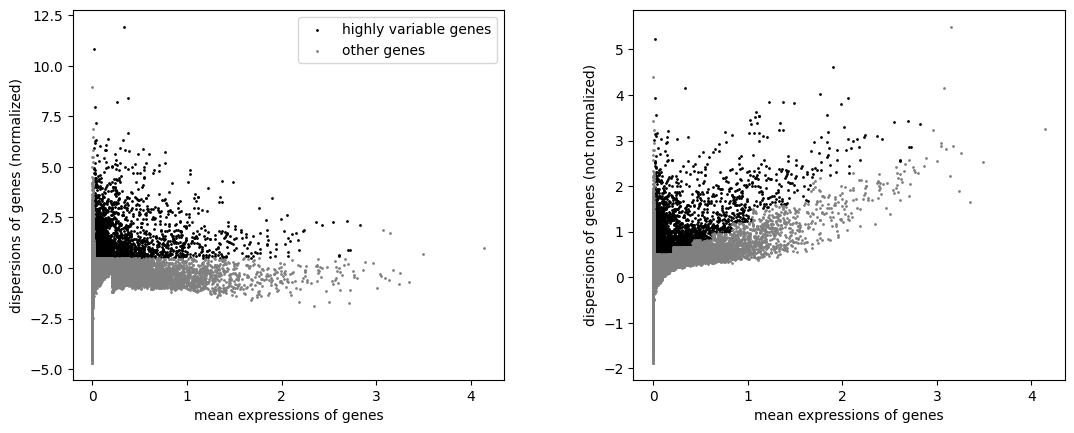

In [ ]:
sc.pp.highly_variable_genes(adata)
sc.pl.highly_variable_genes(adata)

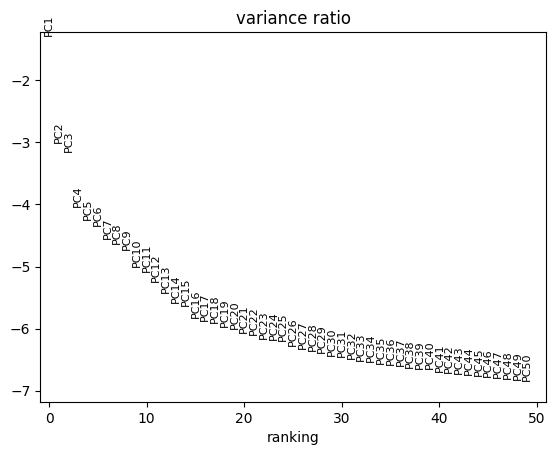

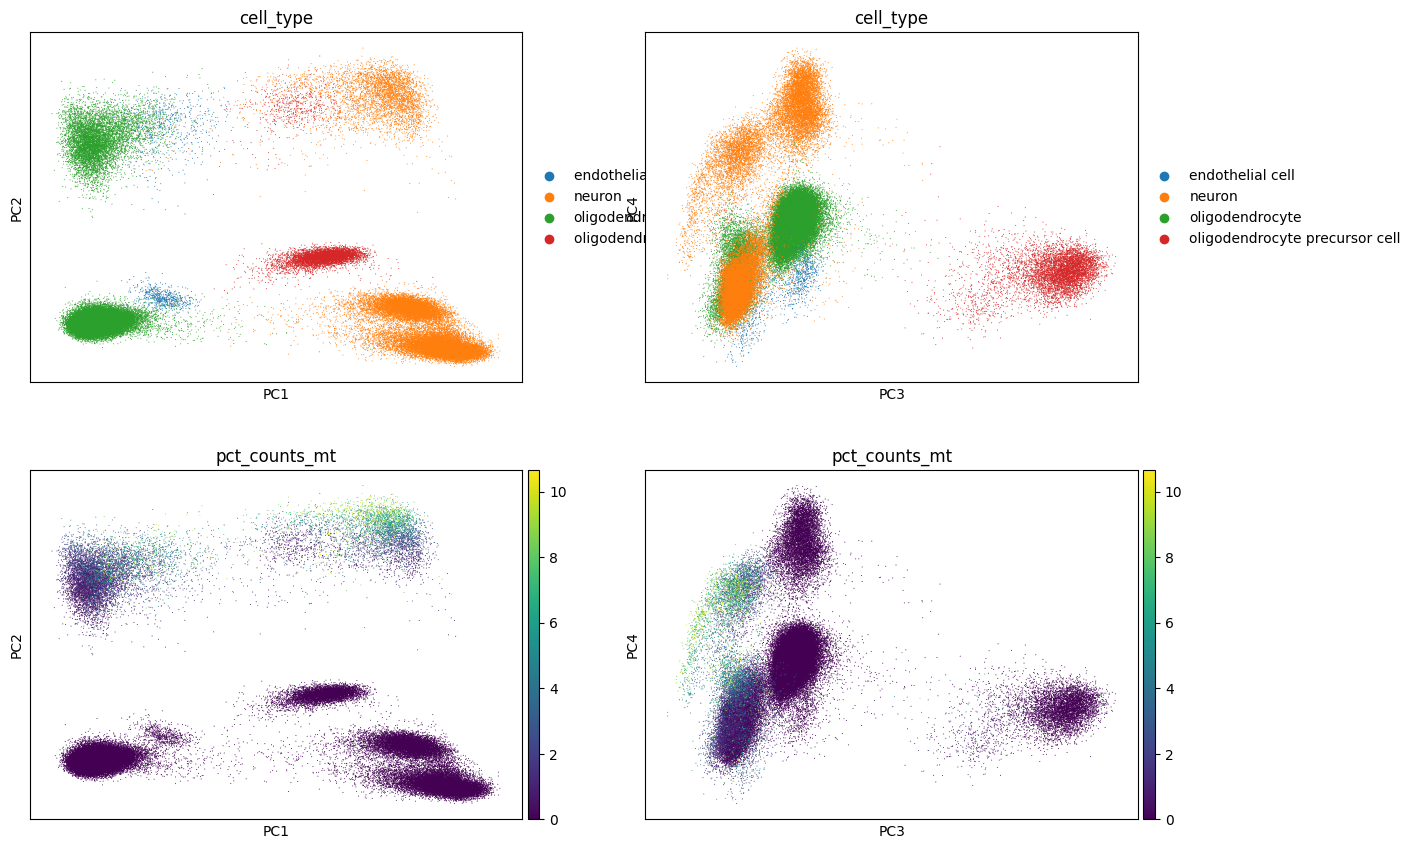

In [ ]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)
sc.pl.pca(
    adata,
    color=["cell_type", "cell_type", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)


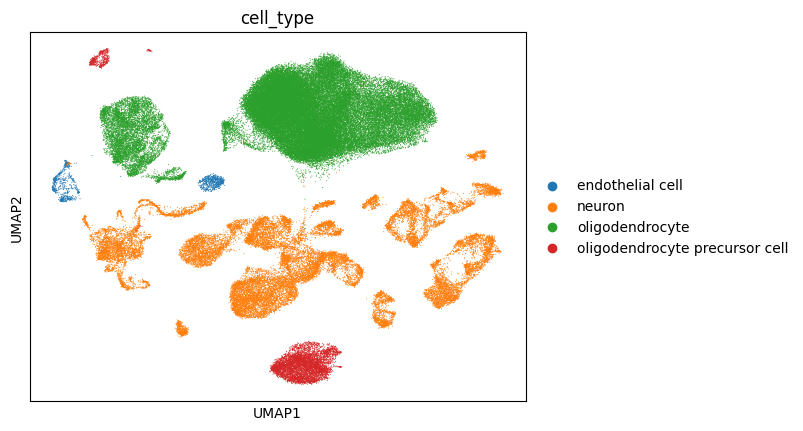

In [ ]:
sc.pl.umap(
    adata,
    color="dataset_id",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

In [ ]:
target_id = "d3cb449b-c2b1-4b50-a7f1-21203535fe61"

# create the new batch column
adata.obs["batch"] = np.where(
    adata.obs["dataset_id"] == target_id,
    "batch_roussos",
    "batch_kamath"
)

# verify
print(adata.obs[["dataset_id","batch"]].drop_duplicates())


                                 dataset_id          batch
0      f5be4b96-f5a3-4c3d-84ac-6f69daf744d5   batch_kamath
632    4dd1cd23-fc4d-4fd1-9709-602540f3ca6f   batch_kamath
1176   5829c7ba-697f-418e-8b98-d605b192dc48   batch_kamath
8552   251b1a7e-d050-4486-8d50-4c2619eb0f46   batch_kamath
12712  d3cb449b-c2b1-4b50-a7f1-21203535fe61  batch_roussos


In [ ]:
pd.crosstab(adata.obs['batch'], adata.obs['cell_type'])

cell_type,endothelial cell,neuron,oligodendrocyte,oligodendrocyte precursor cell
batch,,,,
batch_kamath,632,4038,7376,544
batch_roussos,595,24495,56407,5690


In [ ]:
import gc
gc.collect()

63610

In [ ]:
#table of how many cells in each cell type
adata.obs['cell_type'].value_counts()

,count
cell_type,
oligodendrocyte,63783
neuron,28533
oligodendrocyte precursor cell,6234
endothelial cell,1227


In [ ]:
# save
from google.colab import drive
drive.mount('/content/drive')
dst = '/content/drive/MyDrive/adata_parkinsons_100k_processed.h5ad'
adata.write(dst)
print("Saved to Drive via Colab mount:", dst)

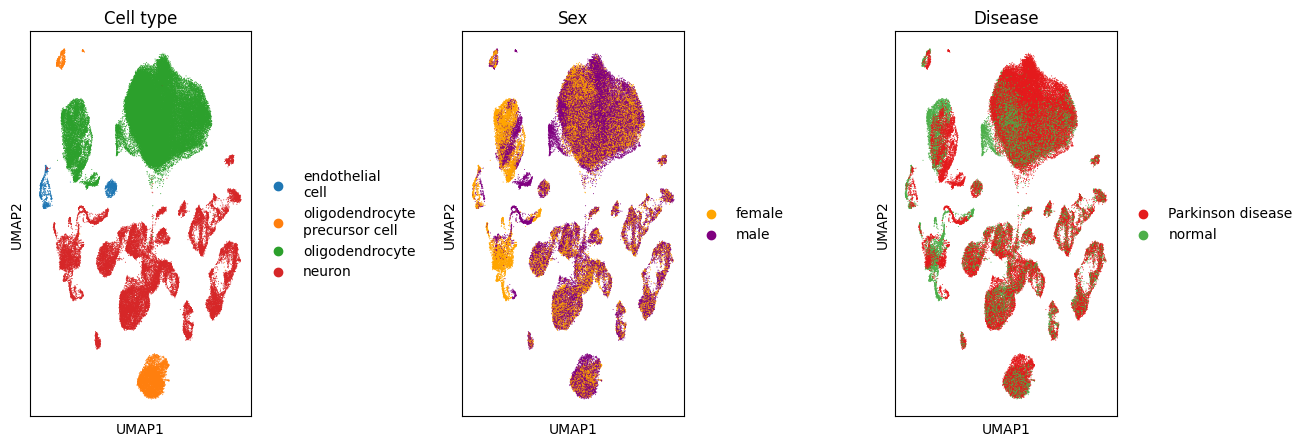

In [ ]:
import textwrap

# 1) wrap your cell_type labels at ~15 chars
#    build a mapping from original → wrapped string
orig = adata.obs['cell_type'].astype(str).unique()
wrapped_map = {
    c: "\n".join(textwrap.wrap(c, 15))
    for c in orig
}

# apply it and make a Categorical
adata.obs['cell_type_wrap'] = adata.obs['cell_type'].map(wrapped_map).astype('category')

# now reorder the categories to match the original order
new_cats = [wrapped_map[c] for c in orig]
adata.obs['cell_type_wrap'] = adata.obs['cell_type_wrap'].cat.reorder_categories(new_cats)

# 2) define custom palettes
sex_palette     = {'female': 'orange', 'male': 'purple'}
disease_palette = {'normal': '#4DAF4A', 'Parkinson disease': '#E41A1C'}

# 3) plot side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# — panel 1: wrapped cell types
sc.pl.umap(
    adata,
    color='cell_type_wrap',
    ax=axes[0],
    show=False,
    size=2,
    legend_loc='right margin',
)
axes[0].set_title('Cell type')

# — panel 2: sex
sc.pl.umap(
    adata,
    color='sex',
    ax=axes[1],
    show=False,
    size=2,
    palette=sex_palette,
    legend_loc='right margin',
)
axes[1].set_title('Sex')

# — panel 3: disease
sc.pl.umap(
    adata,
    color='disease',
    ax=axes[2],
    show=False,
    size=2,
    palette=disease_palette,
    legend_loc='right margin',
)
axes[2].set_title('Disease')

# after making your 3-panel plot...
plt.subplots_adjust(wspace=.95, right=.85)  # keep your original margins



# Data Splitting

In [ ]:
#!pip install --quiet gdown

import gdown
file_id = "1wGcnEUQltYX49XDcUErT2WUsIrA9UJpF"
url     = f"https://drive.google.com/uc?id={file_id}"

# Download it into the Colab VM:
output = "adata_parikinsons_processed_100k.h5ad"
gdown.download(url, output, quiet=False)

adata = ad.read_h5ad(output)
adata

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(adata.obs['cell_type'].unique())

LabelEncoder()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Use highly variable genes only
adata_hvg = adata[:, adata.var['highly_variable']]

# Make feature dataframe
X = pd.DataFrame(adata_hvg.X.toarray(), columns=adata_hvg.var_names, index=adata_hvg.obs_names)

# Add 'sex' as a feature
X['sex'] = adata_hvg.obs['sex'].values
X['cell_type'] = le.transform(adata_hvg.obs['cell_type'].values)

# Encode 'sex' as numeric
X['sex'] = LabelEncoder().fit_transform(X['sex'])

# Define target
y = adata_hvg.obs['disease']

# Encode target (binary classification: Parkinson's disease vs normal)
y = LabelEncoder().fit_transform(y)

In [ ]:
X['cell_type'].unique()

array([0, 3, 2, 1])

In [ ]:
sex_disease_counts = pd.crosstab(adata_hvg.obs['disease'], adata_hvg.obs['sex'])

print(sex_disease_counts)

sex                female   male
disease                         
Parkinson disease   29671  43699
normal              12006  14401


In [ ]:
y

array([1, 1, 1, ..., 1, 0, 0])

# Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


# Combine features, target, and metadata into one DataFrame
df = X.copy()
y = pd.Series(y, index=X.index, name="disease")
df['target']     = y
df['cell_type']  = adata_hvg.obs['cell_type'].values

sex_labels = {0: 'female', 1: 'male'}

# Prepare a place to store results
results = {}
clfs = {}

# Loop over cell types
for ct in df['cell_type'].unique():
    print(f"\n=== Cell type: {ct} ===")
    df_ct = df[df['cell_type'] == ct]
    clfs[ct] = {'female': [], 'male': []}
    results[ct] = {}
    # for average accuracy, AUROC, precision, recall, sensitivity, and specificity
    avg_accuracy = 0
    avg_auroc = 0
    avg_precision = 0
    avg_recall = 0
    avg_sensitivity = 0
    avg_specificity = 0
    avg_f1 = 0

    # For each sex within this cell type
    for sex_value, sex_name in sex_labels.items():
        print(f"-- sex = {sex_name}")
        feature_counts = Counter()
        df_sex = df_ct[df_ct['sex'] == sex_value]
        print(df_sex['target'].nunique())
        # skip if too few samples
        if df_sex['target'].nunique() < 2 or len(df_sex) < 20:
            print(f"   skipping {sex_name} (n={len(df_sex)}, classes={df_sex['target'].unique()})")
            continue

        # 100 random iterations
        for i in tqdm(range(100)):
            # balance disease vs control
            g0 = df_sex[df_sex['target'] == 0]
            g1 = df_sex[df_sex['target'] == 1]
            n   = min(len(g0), len(g1))
            bal = pd.concat([
                g0.sample(n=n, random_state=i),
                g1.sample(n=n, random_state=i)
            ])

            # split out features / label
            X_bal = bal.drop(columns=['target','sex','cell_type'])
            y_bal = bal['target']

            X_tr, X_te, y_tr, y_te = train_test_split(
                X_bal, y_bal,
                test_size=0.2,
                random_state=i,
                stratify=y_bal
            )

            clf = RandomForestClassifier(n_estimators=500, random_state=i)
            clf.fit(X_tr, y_tr)
            clfs[ct][sex_name].append(clf)

            y_pred = clf.predict(X_te)
            y_prob = clf.predict_proba(X_te)[:, 1]
            avg_auroc += roc_auc_score(y_te, y_prob)
            avg_precision += precision_score(y_te, y_pred)
            avg_recall += recall_score(y_te, y_pred)
            confusion = confusion_matrix(y_te, y_pred)
            # Sensitivity = true positive / (true positive + false negative)
            sensitivity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
            # Specificity = true negative / (true negative + false positive)
            specificity = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])
            # Accuracy = (true positive + true negative) / all predictions
            avg_accuracy +=  accuracy_score(y_te, y_pred)
            avg_sensitivity += sensitivity
            avg_specificity += specificity
            avg_f1 += f1_score(y_te, y_pred)

            # record top-10 features this run
            imp    = clf.feature_importances_
            names  = X_tr.columns
            top10  = [names[j] for j in np.argsort(imp)[-10:]]
            feature_counts.update(top10)

        # build DataFrame of freq across 100 runs, keep top 100
        df_feat = (
            pd.DataFrame.from_dict(feature_counts, orient='index', columns=['count'])
              .sort_values('count', ascending=False)
              .head(100)
        )
        results[ct][sex_name] = df_feat
        avg_accuracy /= 100
        avg_auroc /= 100
        avg_precision /= 100
        avg_recall /= 100
        avg_specificity /= 100
        avg_sensitivity /= 100
        avg_f1 /= 100

        print(f"\nAverage accuracy: {avg_accuracy:.3f}")
        print(f"\nAverage AUROC: {avg_auroc:.3f}")
        print(f"\nAverage precision: {avg_precision:.3f}")
        print(f"\nAverage recall: {avg_recall:.3f}")
        print(f"\nAverage sensitivity: {avg_sensitivity:.3f}")
        print(f"\nAverage specificity: {avg_specificity:.3f}")
        print(f"\nAverage f1: {avg_f1:.3f}")
        print("\n")



In [ ]:
import pickle

# 2) Mount & copy to Drive (Colab)
try:
    from google.colab import drive
    drive.mount('/content/drive')
    dst = '/content/drive/MyDrive/rf_feature_counts_parkinsons.pkl'
    with open(dst, "wb") as f:
        pickle.dump(results, f)
    print("Also saved to Drive at", dst)
except Exception as e:
    print("Drive mount failed:", e)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Also saved to Drive at /content/drive/MyDrive/rf_feature_counts_parkinsons.pkl
